<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Kepler_light_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroquery astro-gala

     |████████████████████████████████| 4.5 MB 34.0 MB/s 
     |████████████████████████████████| 12.5 MB 34.5 MB/s 
     |████████████████████████████████| 802 kB 39.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 30.6 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=86f147989496d927244e2c0cbbb9794a09807c7493bef1fe54146af89059dfad
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


# **Imports**


In [49]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from astroquery.mast import Mast
from astroquery.mast import Observations
import os
sb.set_style('darkgrid')

# **Data**

In [54]:
kepler_id = "011446443"
kepler_obs= Observations.query_criteria(target_name="kplr" + kepler_id,obs_collection='kepler')
kepler_product= Observations.get_product_list(kepler_obs[1])
kepler_filter = Observations.filter_products(kepler_product, mrp_only= False) 
kepler_filter_df = kepler_filter.to_pandas()

In [67]:
help(Observations.query_criteria)

Help on function query_criteria in module astroquery.utils.process_asyncs:

query_criteria(self, *args, **kwargs)
    Queries the service and returns a table object.
    
    Given an set of criteria, returns a list of MAST observations.
    Valid criteria are returned by ``get_metadata("observations")``
    
    Parameters
    ----------
    pagesize : int, optional
        Can be used to override the default pagesize.
        E.g. when using a slow internet connection.
    page : int, optional
        Can be used to override the default behavior of all results being returned to obtain
        one sepcific page of results.
    **criteria
        Criteria to apply. At least one non-positional criteria must be supplied.
        Valid criteria are coordinates, objectname, radius (as in `query_region` and `query_object`),
        and all observation fields returned by the ``get_metadata("observations")``.
        The Column Name is the keyword, with the argument being one or more acceptab

In [66]:
kepler_filter_df['description'].unique

<bound method Series.unique of 0                                          Preview-Full
1     tar file for Target Pixel Short Cadence (TPS) ...
2     tar file for Lightcurves Short Cadence (CSC) -...
3                   Lightcurve Short Cadence (CSC) - Q0
4                   Lightcurve Short Cadence (CSC) - Q1
                            ...                        
74               Target Pixel Short Cadence (TPS) - Q15
75               Target Pixel Short Cadence (TPS) - Q15
76               Target Pixel Short Cadence (TPS) - Q15
77               Target Pixel Short Cadence (TPS) - Q17
78               Target Pixel Short Cadence (TPS) - Q17
Name: description, Length: 79, dtype: object>

In [63]:
df_fits = kepler_filter_df[0:0]
for i, row in kepler_filter_df.iterrows():
  exten = row['productFilename'][-4:]
  if exten=='fits':
    df_fits = df_fits.append(row)

In [64]:
df_fits

,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
3,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q0,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009131110544_slc.fits,1457280,601031,PUBLIC,2
4,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q1,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009166044711_slc.fits,4947840,601031,PUBLIC,2
5,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q2,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009201121230_slc.fits,4550400,601031,PUBLIC,2
6,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q2,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009231120729_slc.fits,4432320,601031,PUBLIC,2
7,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q2,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009259162342_slc.fits,4011840,601031,PUBLIC,2
8,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009291181958_slc.fits,4484160,601031,PUBLIC,2
9,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009322144938_slc.fits,4440960,601031,PUBLIC,2
10,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q3,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2009350160919_slc.fits,3844800,601031,PUBLIC,2
11,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q4,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2010009094841_slc.fits,3096000,601031,PUBLIC,2
12,601031,Kepler,timeseries,kplr011446443_sc_Q113313330333033302,Lightcurve Short Cadence (CSC) - Q5,C,mast:KEPLER/url/missions/kepler/lightcurves/01...,SCIENCE,Minimum Recommended Products,SLC,NaN,Kepler,NaN,EX_STKS,kplr011446443-2010111051353_slc.fits,4659840,601031,PUBLIC,2


In [ ]:
df = Observations.download_products(kepler_filter, mrp_only=False, cache= False)
df

'./mastDownload/Kepler/kplr005449910_lc_Q011111111111111111/kplr005449910-2009259160929_llc.fits'

In [35]:
filename = f"{df['Local Path'].value[0]}"
fits.info(filename)

Filename: ./mastDownload/Kepler/kplr005449910_lc_Q011111111111111111/kplr005449910-2009259160929_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   4354R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (7, 6)   int32   


In [36]:
with fits.open(filename) as hdulist:
  hdr1 = hdulist[1].header
print(repr(hdr1[0:24]))

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4354 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [37]:
with fits.open(filename) as hdulist:
  bnry1 = hdulist[1].data
table = Table(bnry1)  
table[1:9]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.54083679060568,0.0029277706,2966,484088.84,17.760166,1977.3949,0.67520267,nan,nan,256,nan,nan,nan,nan,147.06954978089587,3.662539e-05,130.6825591350326,2.9823157e-05,0.0024025368,0.1285209
169.56127101249876,0.0029283925,2967,484034.7,17.759298,1973.0264,0.67575604,nan,nan,8448,nan,nan,nan,nan,147.06956036520654,3.66324e-05,130.68222277241148,2.9828438e-05,0.0022961,0.1282603
169.58170523415174,0.0029290142,2968,484054.25,17.759604,1975.4304,0.6746416,nan,nan,256,nan,nan,nan,nan,147.06954185727284,3.663176e-05,130.6817686665593,2.9830586e-05,0.0022687528,0.12752017
169.60213945557916,0.0029296356,2969,484019.5,17.75901,1975.2075,0.67498714,nan,nan,256,nan,nan,nan,nan,147.0695303673383,3.6637146e-05,130.6815199904004,2.983596e-05,0.0019894803,0.12719117
169.62257357654016,0.0029302565,2970,484007.28,17.758802,1975.3481,0.6760361,nan,nan,256,nan,nan,nan,nan,147.06959779308502,3.6639136e-05,130.68125923428266,2.983798e-05,0.0019886722,0.12683825
169.6430078974954,0.0029308775,2971,484000.5,17.75875,1976.0105,0.67606217,nan,nan,256,nan,nan,nan,nan,147.0694402586894,3.664619e-05,130.6812587936065,2.9841458e-05,0.0015568506,0.12655932
169.66344211822434,0.0029314982,2972,483974.56,17.756754,1976.7711,0.6756269,nan,nan,256,nan,nan,nan,nan,147.06951731312526,3.6645506e-05,130.68095386199178,2.9848961e-05,0.0016661834,0.12637444
169.68387623871968,0.0029321187,2973,483953.34,17.75652,1979.4987,0.67520595,nan,nan,256,nan,nan,nan,nan,147.06940958150835,3.665383e-05,130.68095262091836,2.9853949e-05,0.0014282734,0.12619184


In [43]:
table.colnames

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

In [38]:
with fits.open(filename, mode="readonly") as hdulist:
  bjdrefi = hdulist[1].header['BJDREFI']
  bjdreff = hdulist[1].header['BJDREFF']

  times = hdulist[1].data['time']
  sap_fluxes = hdulist[1].data['sap_flux']
  pdcsap_fluxes = hdulist[1].data['pdcsap_flux']

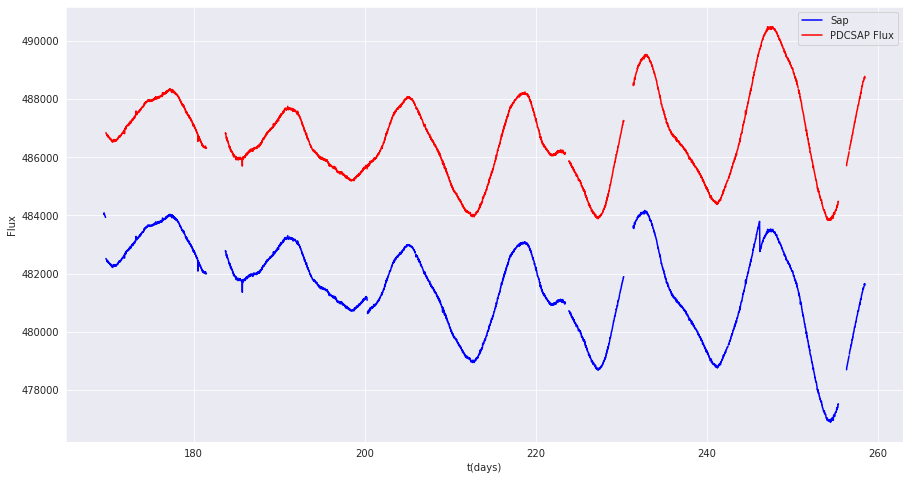

In [39]:
bjds = times + bjdrefi + bjdreff

plt.figure(figsize =(15,8))

plt.plot(times, sap_fluxes, '-b', label ='Sap')
plt.plot(times, pdcsap_fluxes, '-r', label='PDCSAP Flux') 
plt.xlabel('t(days)')
plt.ylabel('Flux')
plt.legend()

plt.show()

In [40]:
with fits.open(filename) as hdulist: 
    imgdata = hdulist[2].data

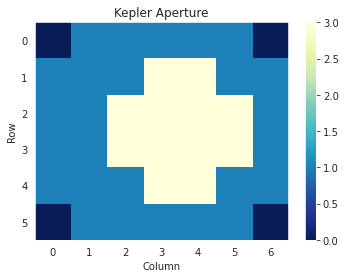

In [41]:
plt.imshow(imgdata, cmap=plt.cm.YlGnBu_r)
plt.title('Kepler Aperture')
plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(False)
plt.colorbar()